<h2>Caveat</h2>
Web sites often change the format of their pages so this may not always work. If it doesn't, rework the examples after examining the html content of the page (most browsers will let you see the html source - look for a "page source" option - though you might have to turn on the developer mode in your browser preferences. For example, on Chrome you need to click the "developer mode" check box under Extensions in the Preferences/Options menu. 

<h1>Scraping web pages</h1>
<li>Most data that resides on the web is in HTML 
<li>HTML: HyperText Markup Language
<li>An html web page is a structured document
<li>We can exploit this structure to extract data from the page

<li>Learn html and css at <a href="https://www.khanacademy.org/computing/computer-programming/html-css">this site</a>

<b>Web scraping</b>: Automating the process of extracting information from web pages<br>
<li>for data collection and analysis
<li>for incorporating in a web app 

<h2>Python libraries for web scraping</h2>
<li><b>requests</b> for handling the request-response cycle
<li><b>beautifulsoup4</b> for extracting data from an html string
<li><b>selenium</b> for extracting data from an html string and managing the response process, particularly when a page contains JavaScript or when a button needs to be clicked

<h2>Beautiful Soup</h2>
<li>html and xml parser
<li>makes use of formatted html tags and css properties to extract data
<li>https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<h2>Web scraping using beautifulsoup4</h2>

<h3>Import necessary modules</h3>

In [1]:
import requests
from bs4 import BeautifulSoup

<h3>The http request response cycle</h3>

In [2]:
url = "http://www.epicurious.com/search/Tofu Chili"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Success


In [3]:
keywords = input("Please enter the things you want to see in a recipe")
url = "http://www.epicurious.com/search/" + keywords
print(url)
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Please enter the things you want to see in a recipebeef
http://www.epicurious.com/search/beef
Success


<h3>Set up the BeautifulSoup object</h3>

In [4]:
response.content

b'<!doctype html>\n<html>\n  <head><meta charset="utf-8">\n<meta name="apple-itunes-app" content="app-id=312101965" />\n<title>Search | Epicurious.com</title>\n<link rel="dns-prefetch" href="//assets.adobedtm.com">\n<link rel="dns-prefetch" href="https://www.google-analytics.com">\n<link rel="dns-prefetch" href="//tpc.googlesyndication.com">\n<link rel="dns-prefetch" href="//static.parsely.com">\n<link rel="dns-prefetch" href="//condenast.demdex.net">\n<link rel="dns-prefetch" href="//capture.condenastdigital.com">\n<link rel="dns-prefetch" href="//pixel.condenastdigital.com">\n<link rel="dns-prefetch" href="//use.typekit.net">\n<link rel="dns-prefetch" href="//fonts.typekit.net">\n<link rel="dns-prefetch" href="//p.typekit.net">\n<link rel="dns-prefetch" href="//assets.epicurious.com">\n<link rel="dns-prefetch" href="//ad.doubleclick.net">\n<link rel="dns-prefetch" href="//pagead2.googlesyndication.com">\n<link rel="dns-prefetch" href="//z.moatads.com">\n\n<meta content="en_US" proper

In [5]:
BeautifulSoup(response.content)

<!DOCTYPE html>
<html>
<head><meta charset="utf-8"/>
<meta content="app-id=312101965" name="apple-itunes-app"/>
<title>Search | Epicurious.com</title>
<link href="//assets.adobedtm.com" rel="dns-prefetch"/>
<link href="https://www.google-analytics.com" rel="dns-prefetch"/>
<link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
<link href="//static.parsely.com" rel="dns-prefetch"/>
<link href="//condenast.demdex.net" rel="dns-prefetch"/>
<link href="//capture.condenastdigital.com" rel="dns-prefetch"/>
<link href="//pixel.condenastdigital.com" rel="dns-prefetch"/>
<link href="//use.typekit.net" rel="dns-prefetch"/>
<link href="//fonts.typekit.net" rel="dns-prefetch"/>
<link href="//p.typekit.net" rel="dns-prefetch"/>
<link href="//assets.epicurious.com" rel="dns-prefetch"/>
<link href="//ad.doubleclick.net" rel="dns-prefetch"/>
<link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/>
<link href="//z.moatads.com" rel="dns-prefetch"/>
<meta content="en_US" itemprop="inLangu

In [6]:
results_page = BeautifulSoup(response.content,'lxml')
print(results_page.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="app-id=312101965" name="apple-itunes-app"/>
  <title>
   Search | Epicurious.com
  </title>
  <link href="//assets.adobedtm.com" rel="dns-prefetch"/>
  <link href="https://www.google-analytics.com" rel="dns-prefetch"/>
  <link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
  <link href="//static.parsely.com" rel="dns-prefetch"/>
  <link href="//condenast.demdex.net" rel="dns-prefetch"/>
  <link href="//capture.condenastdigital.com" rel="dns-prefetch"/>
  <link href="//pixel.condenastdigital.com" rel="dns-prefetch"/>
  <link href="//use.typekit.net" rel="dns-prefetch"/>
  <link href="//fonts.typekit.net" rel="dns-prefetch"/>
  <link href="//p.typekit.net" rel="dns-prefetch"/>
  <link href="//assets.epicurious.com" rel="dns-prefetch"/>
  <link href="//ad.doubleclick.net" rel="dns-prefetch"/>
  <link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/>
  <link href="//z.moatads.com" rel="dns-prefetch

In [7]:
type(results_page.find_all('div'))

bs4.element.ResultSet

In [8]:
link = 'http://www.epicurious.com' + results_page.find('article').find('a').get('href')


In [20]:
name = results_page.find('article').find('a').get_text()

'Spicy Dry-Fried Beef'

In [21]:
all_recipes = list()
for tag in results_page.find_all('article'):
    link = 'http://www.epicurious.com' + tag.find('a').get('href')
    name = tag.find('a').get_text()
    all_recipes.append((name,link))
all_recipes

[('Spicy Dry-Fried Beef',
  'http://www.epicurious.com/recipes/food/views/spicy-dry-fried-beef'),
 ('The Spicy Somali Sauce That Hides a Story',
  'http://www.epicurious.com/expert-advice/how-to-make-somali-beef-stew-bariis-maraq-article'),
 ('How to Make Beef Bone Broth',
  'http://www.epicurious.com/expert-advice/how-to-make-beef-bone-broth-article'),
 ('8 Ways to Make Soup Faster',
  'http://www.epicurious.com/expert-advice/how-to-make-soup-faster-article'),
 ('The Ultimate Corned Beef and Cabbage',
  'http://www.epicurious.com/holidays-events/the-ultimate-corned-beef-and-cabbage-article'),
 ('Make a Thai-Style Curry Dinner Without a Recipe',
  'http://www.epicurious.com/recipes-menus/how-to-make-thai-curry-without-a-recipe-article'),
 ('A Retro-Classic Christmas Dinner Menu',
  'http://www.epicurious.com/expert-advice/a-retro-classic-christmas-dinner-menu-article'),
 ('The Best Grocery Store in America is Also a Gas Station',
  'http://www.epicurious.com/expert-advice/united-dairy-

In [23]:
results_page.find_all('article')[1]

<article class="article-content-card" data-has-quickview="false" data-index="1" data-reactid="101" itemscope="" itemtype="https://schema.org/ItemPage"><header class="summary" data-reactid="102"><strong class="tag" data-reactid="103">article</strong><h4 class="hed" data-reactid="104" data-truncate="3" itemprop="name"><a data-reactid="105" href="/expert-advice/how-to-make-somali-beef-stew-bariis-maraq-article">The Spicy Somali Sauce That Hides a Story</a></h4><p class="dek" data-reactid="106" data-truncate="1">Hawa Hassan shares her Somalian roots with her Somali chili sauces and recipes like this delicious, crowd-pleasing beef stew.</p></header><a class="photo-link" data-reactid="107" href="/expert-advice/how-to-make-somali-beef-stew-bariis-maraq-article"><div class="photo-wrap" data-reactid="108"><div class="component-lazy pending" data-component="Lazy" data-reactid="109"></div></div></a><a class="view-complete-item" data-reactid="110" href="/expert-advice/how-to-make-somali-beef-stew-

In [24]:
results_page.find_all('article')[0]

<article class="recipe-content-card" data-has-quickview="false" data-index="0" data-reactid="68" itemscope="" itemtype="https://schema.org/Recipe"><header class="summary" data-reactid="69"><strong class="tag" data-reactid="70">recipe</strong><h4 class="hed" data-reactid="71" data-truncate="3" itemprop="name"><a data-reactid="72" href="/recipes/food/views/spicy-dry-fried-beef">Spicy Dry-Fried Beef</a></h4><p class="dek" data-reactid="73" data-truncate="1">This is a typical Sichuan technique for dry-frying beef. Unlike most meat stir-fries, the beef is not marinated; instead it is stir-fried immediately then cooked for a few minutes longer to intensify the beef flavors and to give give the meat a slightly chewy texture.</p><dl class="recipes-ratings-summary" data-reactid="74" data-reviews-count="1" data-reviews-rating="2" itemprop="aggregateRating" itemscope="" itemtype="https://schema.org/AggregateRating"><dt class="rating-label" data-reactid="75">Average user rating</dt><span class="re

In [28]:
list()

[]

In [29]:
all_recipes = list()
for tag in results_page.find_all('article',class_='recipe-content-card'):
    link = 'http://www.epicurious.com' + tag.find('a').get('href')
    name = tag.find('a').get_text()
    all_recipes.append((name,link))
all_recipes

[('Spicy Dry-Fried Beef',
  'http://www.epicurious.com/recipes/food/views/spicy-dry-fried-beef')]

In [14]:
for tag in results_page.find_all('a'):
    if tag.get('href'):
        value = tag.get('href')
        if "recipe" in value:
            print(value)

/recipes/food/views/salad-pizza-with-prosciutto-gorgonzola-blue-cheese
/recipes/food/views/salad-pizza-with-prosciutto-gorgonzola-blue-cheese
/recipes/food/views/salad-pizza-with-prosciutto-gorgonzola-blue-cheese
/recipes/food/views/salad-pizza-with-prosciutto-gorgonzola-blue-cheese
/recipes/food/views/salad-pizza-with-prosciutto-gorgonzola-blue-cheese
/recipes/food/views/summer-pizza-with-salami-zucchini-and-tomatoes
/recipes/food/views/summer-pizza-with-salami-zucchini-and-tomatoes
/recipes/food/views/summer-pizza-with-salami-zucchini-and-tomatoes
/recipes/food/views/summer-pizza-with-salami-zucchini-and-tomatoes
/recipes/food/views/summer-pizza-with-salami-zucchini-and-tomatoes
/recipes/food/views/cast-iron-pizza-with-fennel-and-sausage
/recipes/food/views/cast-iron-pizza-with-fennel-and-sausage
/recipes/food/views/cast-iron-pizza-with-fennel-and-sausage
/recipes/food/views/cast-iron-pizza-with-fennel-and-sausage
/recipes/food/views/cast-iron-pizza-with-fennel-and-sausage
/recipes/f

<h3>BS4 functions</h3>

<h4>find_all finds all instances of a specified tag</h4>
<h4>returns a result_set (a list)</h4>

In [ ]:
all_a_tags = results_page.find_all('a')
print(type(all_a_tags))

In [ ]:
all_a_tags

<h4>find finds the first instance of a specified tag</h4>
<h4>returns a bs4 element</h4>


In [ ]:
div_tag = results_page.find('div')
print(div_tag)

In [ ]:
type(div_tag)


<h4>bs4 functions can be recursively applied on elements</h4>

In [ ]:
div_tag.find('a')

<h4>Both find as well as find_all can be qualified by css selectors</h4>
<li>using selector=value
<li>using a dictionary

<h4>Using selector=value</h4>

In [ ]:
#When using this method and looking for 'class' use 'class_' (because class is a reserved word in python)
#Note that we get a list back because find_all returns a list
results_page.find_all('article',class_="recipe-content-card")

<h4>Using selectors as key value pairs in a dictionary</h4>

In [ ]:
#Since we're using a string as the key, the fact that class is a reserved word is not a problem
#We get an element back because find returns an element
results_page.find('article',{'class':'recipe-content-card'})

<h4>get_text() returns the marked up text (the content) enclosed in a tag.</h4>
<li>returns a string

In [ ]:
results_page.find('article',{'class':'recipe-content-card'}).get_text()

<h4>get returns the value of a tag attribute</h4>
<li>returns a string

In [ ]:
recipe_tag = results_page.find('article',{'class':'recipe-content-card'})
recipe_link = recipe_tag.find('a')
print("a tag:",recipe_link)
link_url = recipe_link.get('href')
print("link url:",link_url)
print(type(link_url))

<h2>Summary of bs4 functions</h2>

 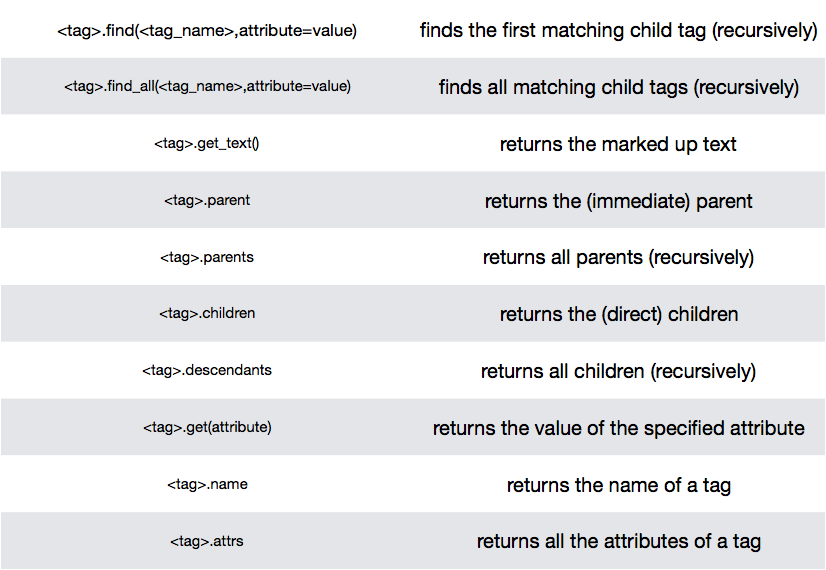

<h1>A function that returns a list containing recipe names, recipe descriptions (if any) and recipe urls</h1>

<ul>
<li style="color:blue">We want to create a list of recipes and links to the recipes</li>
<li>We need to figure out how to ‘programmatically’ extract each recipe name and recipe link

<li>Search for the tag with a unique attribute value that identifies recipes and recipe links
<li>We’ll look at the a (annotate) tags because clickable links are in a tags
</ul>

<div>This is a division:
<p>
<span style="color:red">-1.27</span>
<a href="http://www.columbia.edu">columbia web page</a>
</div>


In [2]:
for tag in results_page.find_all('article'):
    print(tag)

NameError: name 'results_page' is not defined

In [34]:
def get_recipes(keywords):
    import requests
    from bs4 import BeautifulSoup
    url = "http://www.epicurious.com/search/" + keywords
    response = requests.get(url)
    page = BeautifulSoup(response.content,'lxml')
    tags = page.find_all('article',class_='recipe-content-card')
    container = list()
    for tag in tags:
        name = tag.find('a').get_text()
        link = "http://www.epicurious.com" + tag.find('a').get('href')
        description,ingredients,preparation = get_recipe_detail(link)
        container.append((name,link,description,ingredients,preparation))
    return container

        
get_recipes("beef")

[('Beef Chili',
  'http://www.epicurious.com/recipes/food/views/beef-chili',
  '',
  '',
  ''),
 ('Spicy Dry-Fried Beef',
  'http://www.epicurious.com/recipes/food/views/spicy-dry-fried-beef',
  '',
  '',
  ''),
 ('Cold Beef Tenderloin with Tomatoes and Cucumbers',
  'http://www.epicurious.com/recipes/food/views/cold-beef-tenderloin-with-tomatoes-and-cucumbers',
  '',
  '',
  ''),
 ('Beef Sliders with Provolone and Balsamic Onions',
  'http://www.epicurious.com/recipes/food/views/beef-sliders-with-provolone-and-balsamic-onions',
  '',
  '',
  ''),
 ('Fried Meatballs with Tahini Sauce',
  'http://www.epicurious.com/recipes/food/views/deep-fried-beef-and-millet-meatballs-with-tahini-sauce',
  '',
  '',
  ''),
 ('Instant Pot Beef Barbacoa Tacos',
  'http://www.epicurious.com/recipes/food/views/instant-pot-shredded-beef-barbacoa-tacos',
  '',
  '',
  ''),
 ('Slow Cooker Corned Beef Brisket',
  'http://www.epicurious.com/recipes/food/views/slow-cooker-corned-beef-brisket-with-cabbage-potato

In [26]:
def get_recipe_detail(link):
    import requests
    from bs4 import BeautifulSoup
    recipe_page = requests.get(link)
    
    return "","",""

In [36]:
recipe_page = requests.get('http://www.epicurious.com/recipes/food/views/instant-pot-slow-cooked-ground-beef-and-cocoa-chili')
recipe_object = BeautifulSoup(recipe_page.content,'lxml')
recipe_object.find('div',itemprop='description').get_text()

'Slow-cooking and chili-making are a match made in heaven. The tightened lid of the Instant Pot means that the aroma of the chili stays mostly inside the appliance, although sometimes you’ll catch some of the chili scent wafting out, maybe when you come home from errands or work. It’s bound to whet your appetite. This ground beef version has pleasantly deep, bitter notes from the addition of ground cocoa. Those aromas are a tempting reminder of what’s for dinner—and one of the reasons you have the Instant Pot.'

In [9]:
ingredient_list = list()
for ing in recipe_object.find_all('li',class_='ingredient'):
    ing_name = ing.get_text()
    ingredient_list.append(ing_name)
    
print(ingredient_list)

NameError: name 'recipe_object' is not defined

In [24]:
def get_recipes(keywords):
    recipe_list = list()
    import requests
    from bs4 import BeautifulSoup
    url = "http://www.epicurious.com/search/" + keywords
    response = requests.get(url)
    if not response.status_code == 200:
        return None
    try:
        results_page = BeautifulSoup(response.content,'lxml')
        recipes = results_page.find_all('article',class_="recipe-content-card")
        for recipe in recipes:
            recipe_link = "http://www.epicurious.com" + recipe.find('a').get('href')
            recipe_name = recipe.find('a').get_text()
#             try:
#                 recipe_description = recipe.find('p',class_='dek').get_text()
#             except:
#                 recipe_description = ''
            description, ingredients, preparation = get_recipe_info(recipe_link)
            recipe_list.append((recipe_name,description, ingredients, preparation))
        return recipe_list
    except:
        return None

In [25]:
get_recipes("Tofu")

In [23]:
get_recipes('Nothing')

<h2>Let's write a function that</h2>
<h3>given a recipe link</h3>
<h3>returns a dictionary containing the ingredients and preparation instructions</h3>

In [13]:
recipe_link = "http://www.epicurious.com" + '/recipes/food/views/spicy-lemongrass-tofu-233844'

In [14]:
def get_recipe_info(recipe_link):
    recipe_dict = dict()
    import requests
    from bs4 import BeautifulSoup
    try:
        response = requests.get(recipe_link)
        if not response.status_code == 200:
            return recipe_dict
        result_page = BeautifulSoup(response.content,'lxml')
        ingredient_list = list()
        prep_steps_list = list()
        for ingredient in result_page.find_all('li',class_='ingredient'):
            ingredient_list.append(ingredient.get_text())
        for prep_step in result_page.find_all('li',class_='preparation-step'):
            prep_steps_list.append(prep_step.get_text().strip())
        recipe_dict['ingredients'] = ingredient_list
        recipe_dict['preparation'] = prep_steps_list
        return recipe_dict
    except:
        return recipe_dict
        

In [15]:
get_recipe_info(recipe_link)

{'ingredients': ['2 lemongrass stalks, outer layers peeled, bottom white part thinly sliced and finely chopped (about 1/4 cup)',
  '1 1/2 tablespoons soy sauce',
  '2 teaspoons chopped Thai bird chilies or another fresh chili',
  '1/2 teaspoon dried chili flakes',
  '1 teaspoon ground turmeric',
  '2 teaspoons sugar',
  '1/2 teaspoon salt',
  '12 ounces tofu, drained, patted dry and cut into 3/4-inch cubes',
  '4 tablespoons vegetable oil',
  '1/2 yellow onion, cut into 1/8-inch slices',
  '2 shallots, thinly sliced',
  '1 teaspoon minced garlic',
  '4 tablespoons chopped roasted peanuts',
  '10 la lot, or pepper leaves, shredded, or 2/3 cup loosely packed Asian basil leaves'],
 'preparation': ['1. Combine the lemongrass, soy sauce, chilies, chili flakes, turmeric, sugar and salt in a bowl. Add the tofu cubes and turn to coat them evenly. Marinate for 30 minutes.',
  '2. Heat half of the oil in a 12-inch nonstick skillet over moderately high heat. Add the onion, shallot and garlic and 

<h2>Construct a list of dictionaries for all recipes</h2>

In [16]:
def get_all_recipes(keywords):
    results = list()
    all_recipes = get_recipes(keywords)
    for recipe in all_recipes:
        recipe_dict = get_recipe_info(recipe[1])
        recipe_dict['name'] = recipe[0]
        recipe_dict['description'] = recipe[2]
        results.append(recipe_dict)
    return(results)

In [17]:
get_all_recipes("Tofu")

[{'ingredients': ['5 scallions',
   '4 garlic cloves, finely grated',
   '1 (2") piece ginger, peeled, finely grated',
   '1 Tbsp. virgin coconut oil or vegetable oil',
   '2 Tbsp. Thai red curry paste',
   '1 (14-oz.) package firm tofu, drained, broken into 1" pieces',
   '1 cup unsweetened coconut milk',
   'Kosher salt',
   '1 Tbsp. fresh lime juice',
   '1 Fresno chile, thinly sliced (optional)',
   '1 bunch collard greens, leaves halved lengthwise, ribs and stems removed, covered, chilled',
   '1/2 cup cilantro leaves with tender stems',
   '1/2 cup Dang Original coconut chips or toasted unsweetened coconut flakes',
   'Lime wedges (for serving)'],
  'preparation': ['Remove dark green tops from scallions and thinly slice on a diagonal. Place in a small bowl, cover with a damp paper towel, and chill until ready to serve. Thinly slice remaining white and pale green parts crosswise and place in another small bowl; add garlic and ginger. (Have scallion mixture, curry paste, tofu, and 

<h1>Logging in to a web server</h1>

<li>Figure out the login url 
<li>https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page
<li>Look for the login form in the html source
<li>form_tag = page_soup.find('form')
<li>Look for ALL the inputs in the login form (some may be tricky!)
<li>input_tags = form_tag.find_all('input')
<li>Create a Python dict object with key,value pairs for each input
<li>Use requests.session to create an open session object
<li>Send the login request (POST)
<li>Send followup requests keeping the sessions object open

<h2>Get username and password</h2>
<li>Best to store in a file for reuse
<li>You will need to set up your own login and password and place them in a file called wikidata.txt
<li>Line one of the file should contain your username
<li>Line two your password

In [ ]:
with open('/Users/hardeepjohar/Documents/Courses/Fall2018/API_KEYS/wikidata.txt') as f:
    contents = f.read().split('\n')
    username = contents[0]
    password = contents[1]


<h3>Construct an object that contains the data to be sent to the login page</h3>

In [ ]:

payload = {
    'wpName': username,
    'wpPassword': password,
    'wploginattempt': 'Log in',
    'wpEditToken': "+\\",
    'title': "Special:UserLogin",
    'authAction': "login",
    'force': "",
    'wpForceHttps': "1",
    'wpFromhttp': "1",
    #'wpLoginToken': ‘', #We need to read this from the page
    }

<h3>get the value of the login token</h3>

In [ ]:
def get_login_token(response):
    soup = BeautifulSoup(response.text, 'lxml')
    token = soup.find('input',{'name':"wpLoginToken"}).get('value')
    return token


<h3>Setup a session, login, and get data</h3>

In [ ]:
import requests
from bs4 import BeautifulSoup
with requests.session() as s:
    response = s.get('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page')
    payload['wpLoginToken'] = get_login_token(response)
    #Send the login request
    response_post = s.post('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&action=submitlogin&type=login',
                           data=payload)
    #Get another page and check if we’re still logged in
    response = s.get('https://en.wikipedia.org/wiki/Special:Watchlist')
    data = BeautifulSoup(response.content,'lxml')
    print(data.find('div',class_='mw-changeslist').get_text())